In [1]:
%run -n main.py
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
jobs = jobs_manager()

# Сбор

## безопасныедороги.рф

In [2]:
# counts = Counter()
# records = log_progress(read_begtin(), every=5000, size=BEGTIN_LINES)
# for record in records:
#     for key in record:
#         counts[key] += 1

In [3]:
# ok, но для спокойствия соберу сам
# print pd.Series(counts).sort_values().to_string()

In [4]:
%run -n main.py
urls = [
    get_saferoads_page_url(offset=_ * 1000, limit=1000)
    for _ in xrange(150)
]

In [5]:
# fetch_jsons(log_progress(urls, every=1))

In [67]:
%run -n main.py
records = list(log_progress(read_saferoads(urls), every=5000, size=BEGTIN_LINES))

In [68]:
%run -n main.py
saferoads = list(parse_saferoads(records))

In [69]:
del records

In [81]:
%run -n main.py
dump_saferoads(saferoads)

In [94]:
saferoads = list(log_progress(load_saferoads(), every=1000))

## stat.gibdd.ru

In [9]:
# request = get_gibdd_region_request(GIBDD_RUSSIA_ID)
# fetch_gibdd_json(request)

In [10]:
# requests = [get_gibdd_region_request(_.id) for _ in load_gibdd_region(request)]
# for record in log_progress(requests, every=1):
#     fetch_gibdd_json(record)

In [11]:
# gibdd_regions = list(load_raw_gibdd_regions(GIBDD_RUSSIA_ID))
# gibdd_regions.append(GibddRegion(parent_id=GIBDD_RUSSIA_ID, id=GIBDD_RUSSIA_ID, name=u'Россия', level=0))

In [12]:
# dump_gibdd_regions(gibdd_regions)
gibdd_regions = list(load_gibdd_regions())

In [13]:
# months = list(months_range(parse_date('2015-01-01'), parse_date('2016-09-01')))
# requests = []
# for region in gibdd_regions:
#     if region.level == 2:
#         request = get_gibdd_cards_request(region, months)
#         requests.append(request)

In [14]:
# cache = set(list_json_cache())
# %job [fetch_gibdd_json(_) for _ in log_progress(requests, every=1) if _.key not in cache]

In [15]:
# gibdd_cards = list(load_raw_gibdd_cards(log_progress(requests, every=100)))

In [16]:
# # some regions are missing. split requests into smaller chunks
# mapping = {_.id: _ for _ in gibdd_regions}
# region_ids = {_.id for _ in gibdd_regions if _.level == 2}
# ids = {_.region_id for _ in gibdd_cards}
# chunk_requests = []
# for id in region_ids - ids:
#     region = mapping[id]
#     for chunk in get_chunks(months, 10):
#         request = get_gibdd_cards_request(region, chunk)
#         chunk_requests.append(request)

In [17]:
# %job [fetch_gibdd_json(_) for _ in log_progress(chunk_requests, every=1)]

In [18]:
# %run -n main.py
# gibdd_cards = list(load_raw_gibdd_cards(log_progress(chunk_requests + requests, every=100)))

In [19]:
# dump_gibdd_cards(gibdd_cards)
gibdd_cards = list(log_progress(load_gibdd_cards(), every=1000))

# Покрытие

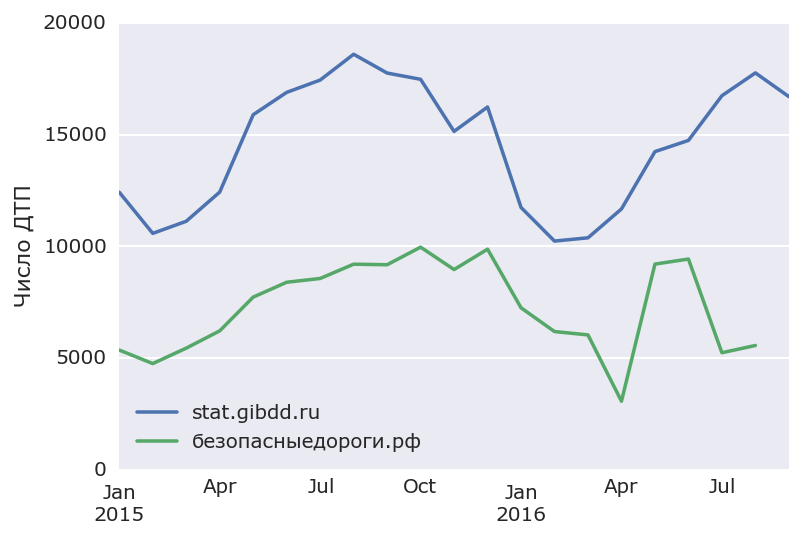

In [20]:
%run -n main.py
show_saferoads_gibdd(saferoads, gibdd_cards)

/Users/alexkuk/envs/mypy/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


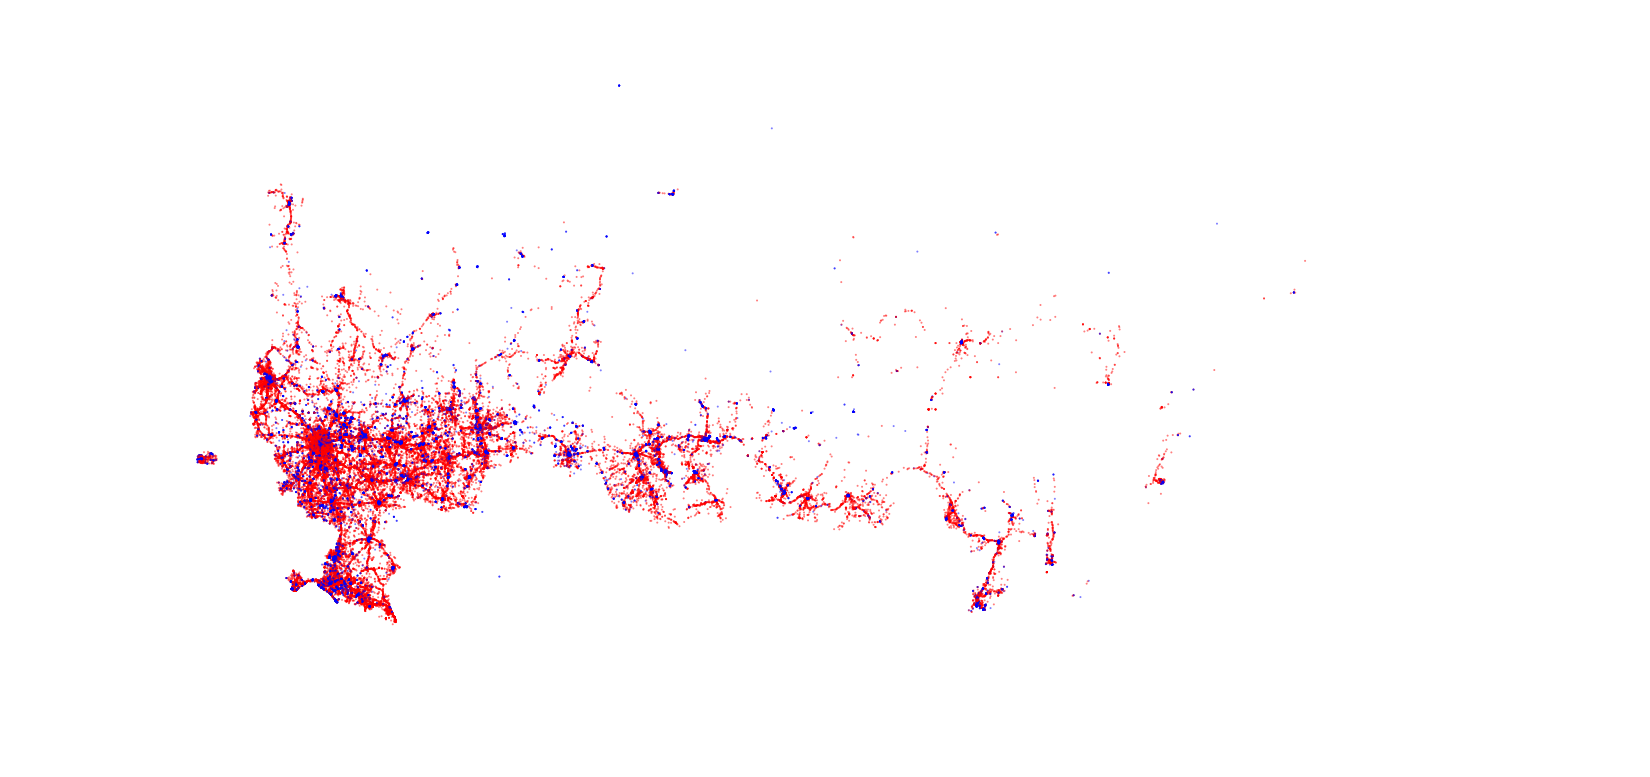

In [21]:
%run -n main.py
# видно, что mia внутри городов
show_mia_by_regions(saferoads)

In [22]:
# говорили что на saferoads только с fatalities , но это похоже не так

# Где

In [23]:
uiks = list(load_uiks())
# 1 - Число избирателей, внесенных в список избирателей на момент окончания голосования
party_cells = [_ for _ in load_party_cells() if _.row_id == 1] 

In [24]:
RUSSIA_MERCATOR_XLIM = (0.2 * 10**7, 1.8 * 10**7)
RUSSIA_MERCATOR_YLIM = (0.5 * 10**7, 1.1 * 10**7)
scale = 4
RUSSIA_DENSITY_WIDTH = int(140 * scale)
RUSSIA_DENSITY_HEIGHT = int(60 * scale)

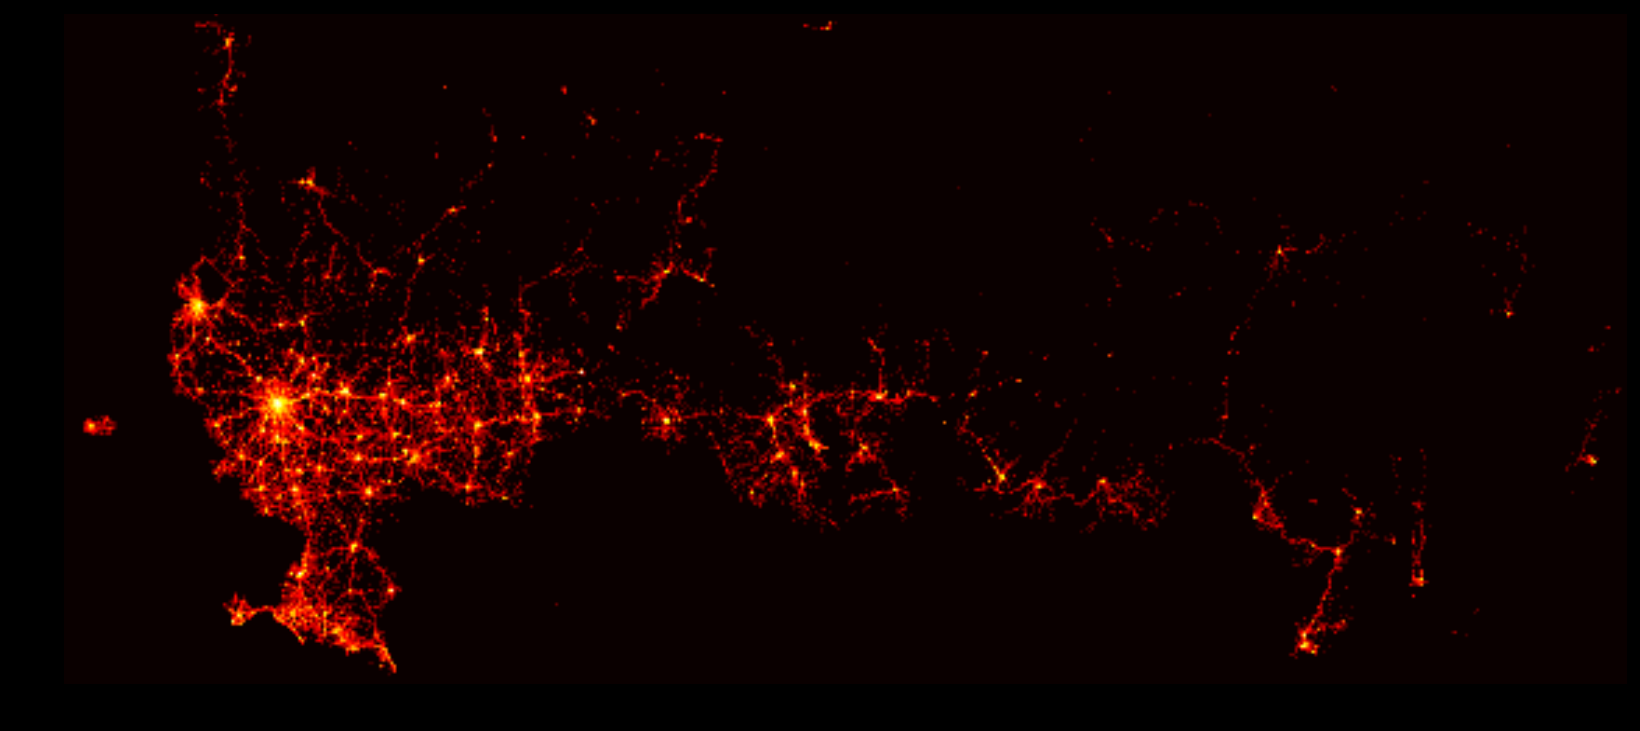

In [28]:
%run -n main.py
saferoads_points = list(get_saferoads_points(saferoads))
saferoads_matrix = points_density(saferoads_points, RUSSIA_MERCATOR_XLIM, RUSSIA_MERCATOR_YLIM, RUSSIA_DENSITY_WIDTH, RUSSIA_DENSITY_HEIGHT)
show_density(saferoads_matrix, cmap='hot')

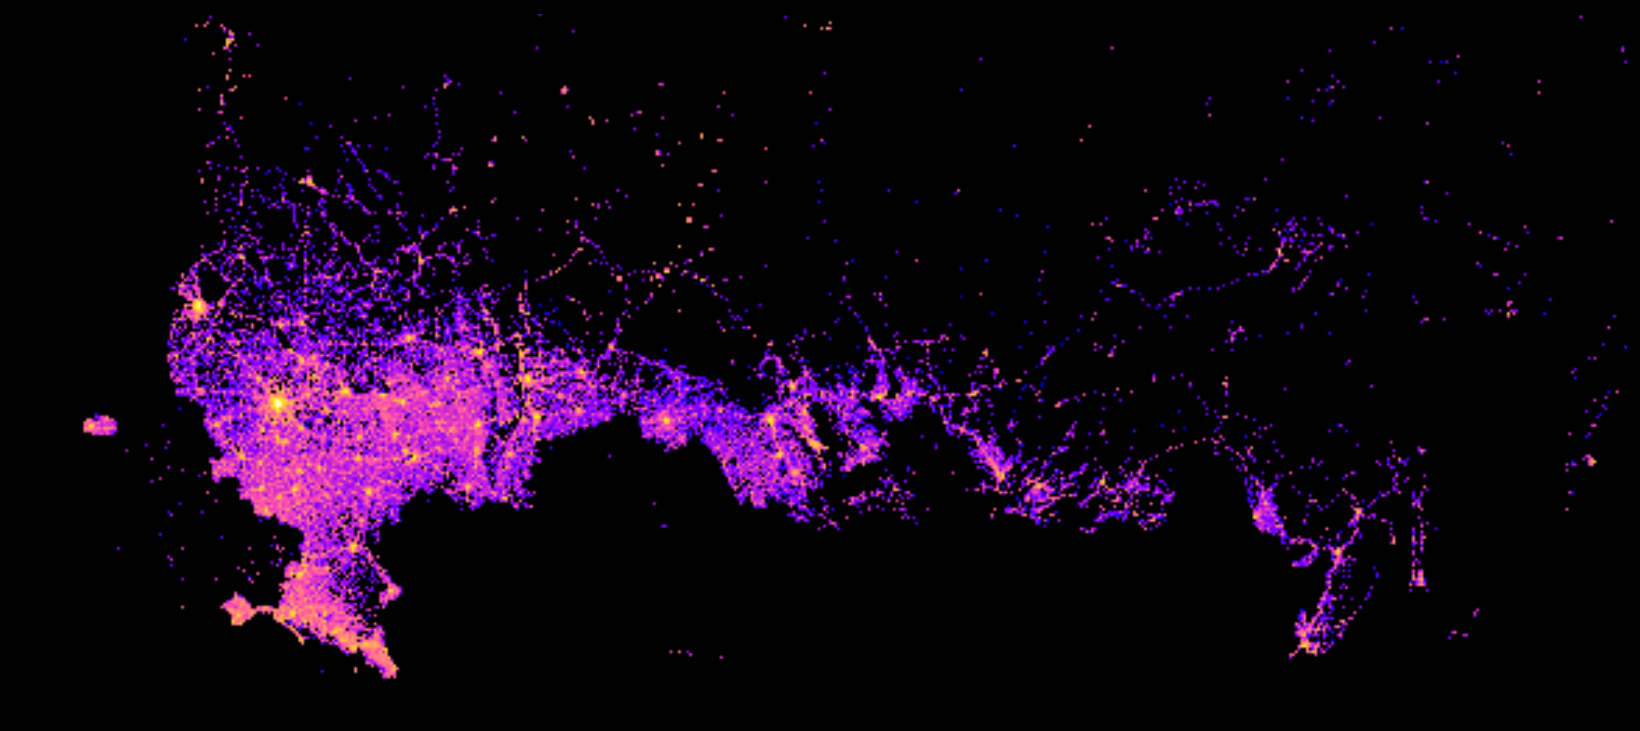

In [29]:
%run -n main.py
uik_points = list(get_uik_points(uiks, party_cells))
uiks_matrix = points_density(uik_points, RUSSIA_MERCATOR_XLIM, RUSSIA_MERCATOR_YLIM, RUSSIA_DENSITY_WIDTH, RUSSIA_DENSITY_HEIGHT)
show_density(uiks_matrix, cmap='gnuplot2')

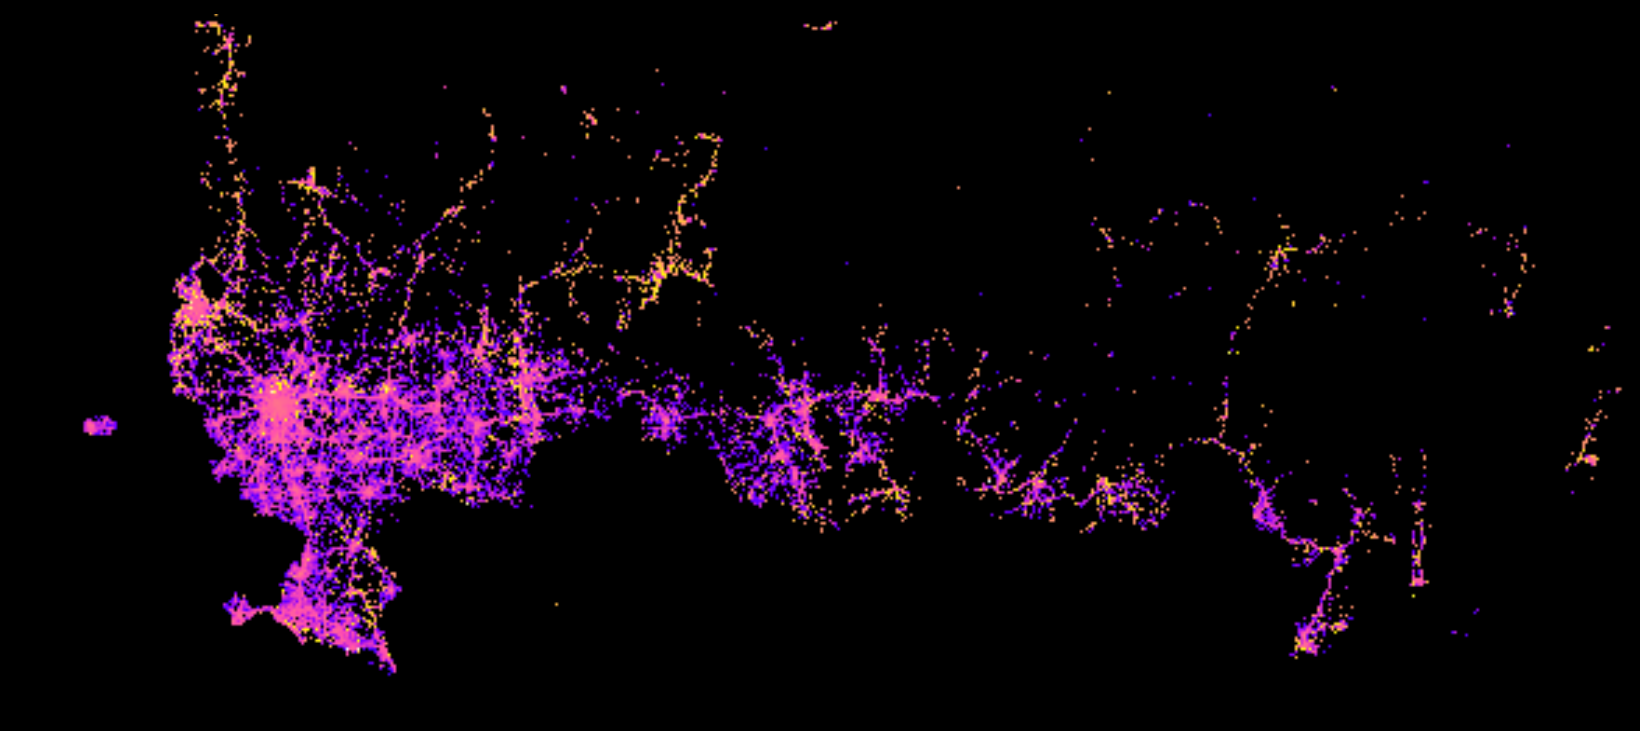

In [30]:
%run -n main.py
matrix = np.log(saferoads_matrix + 1) / (np.log(uiks_matrix + 1) + 1)
show_density(matrix * 100, cmap='gnuplot2')

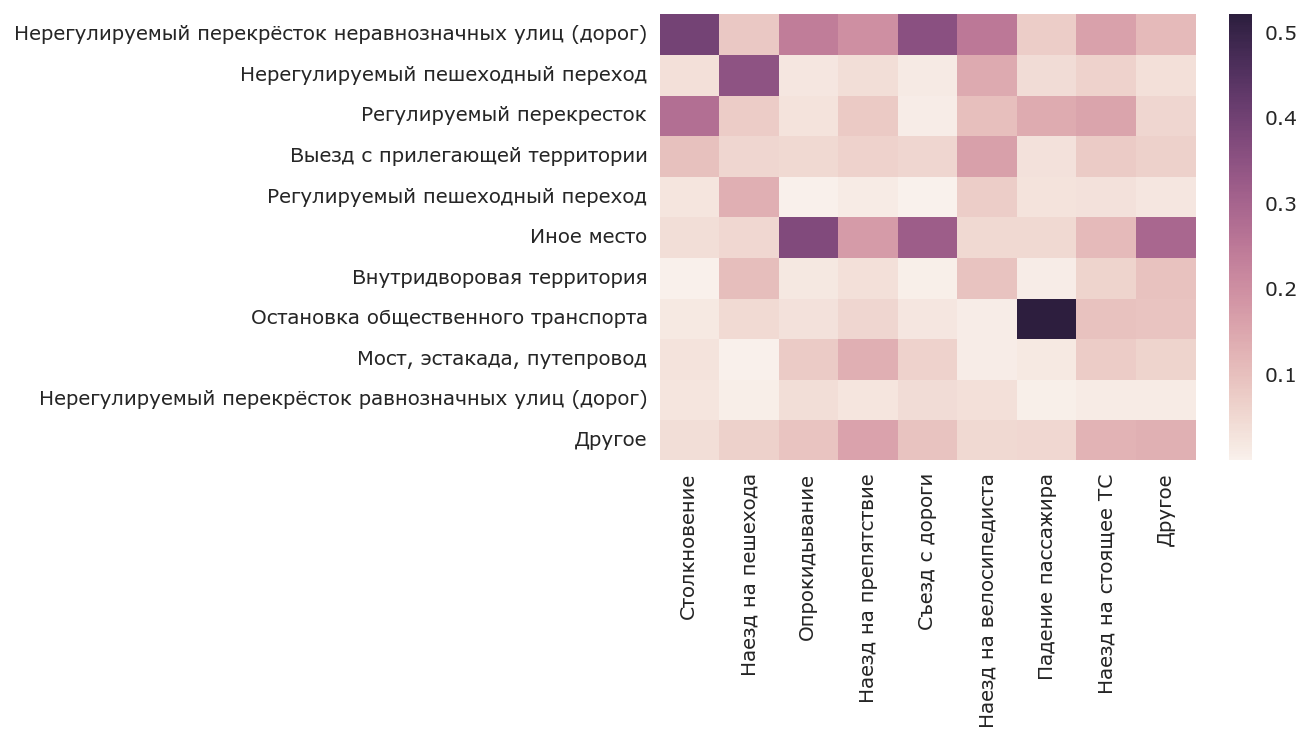

In [31]:
%run -n main.py
show_types_by_places(gibdd_cards)

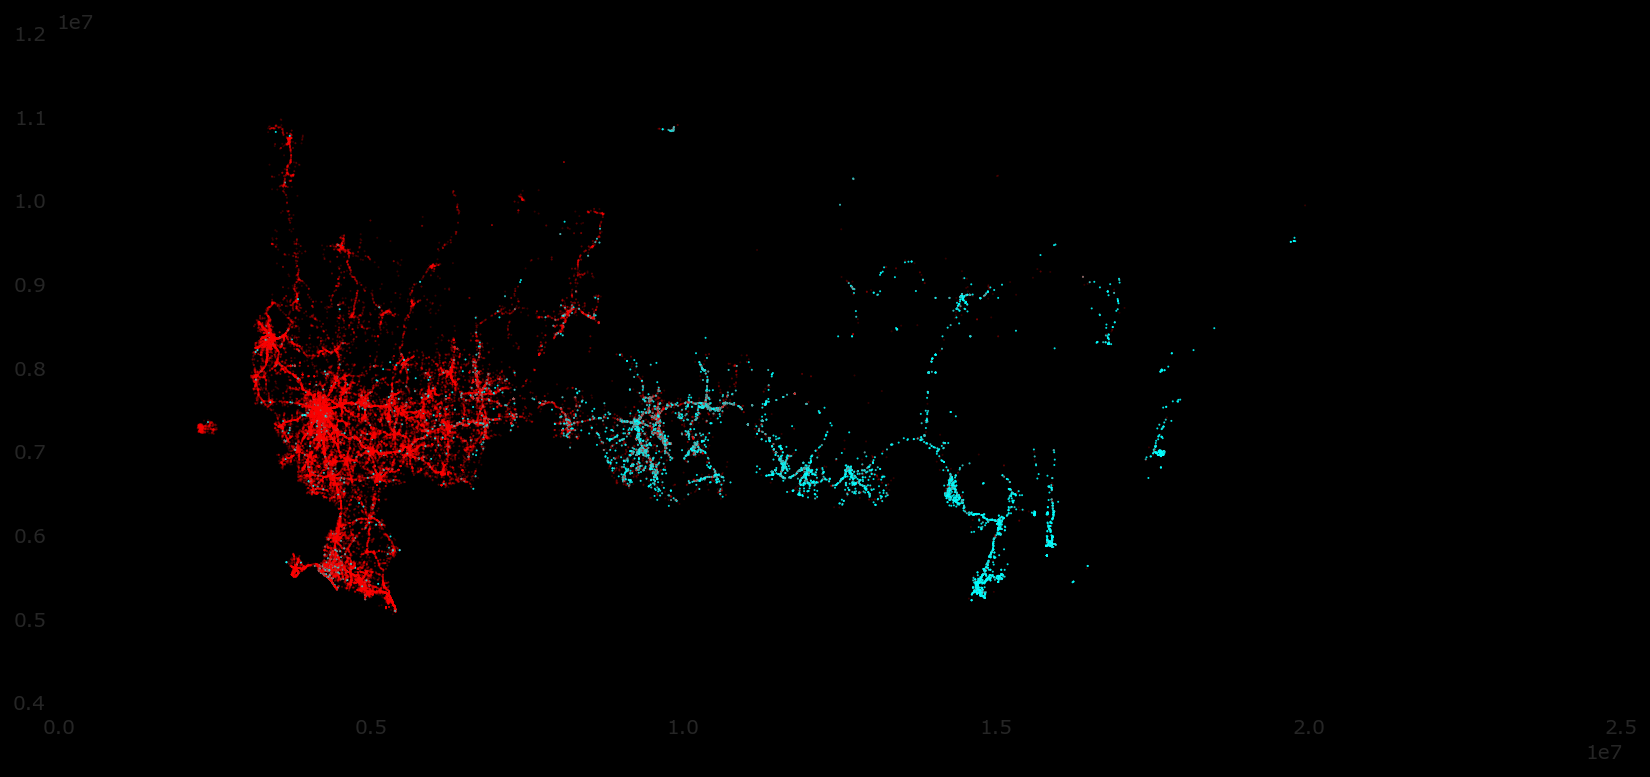

In [32]:
%run -n main.py
show_wheel_by_regions(saferoads)

# Когда

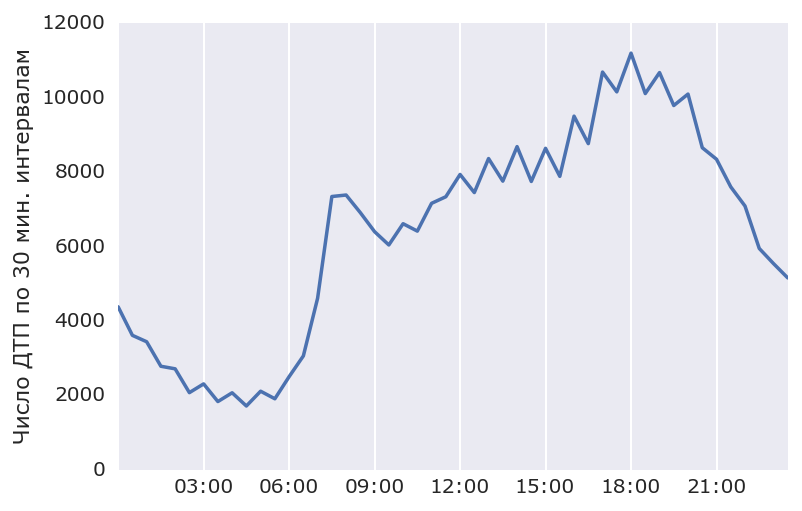

In [33]:
%run -n main.py
show_crashes_during_day(gibdd_cards)

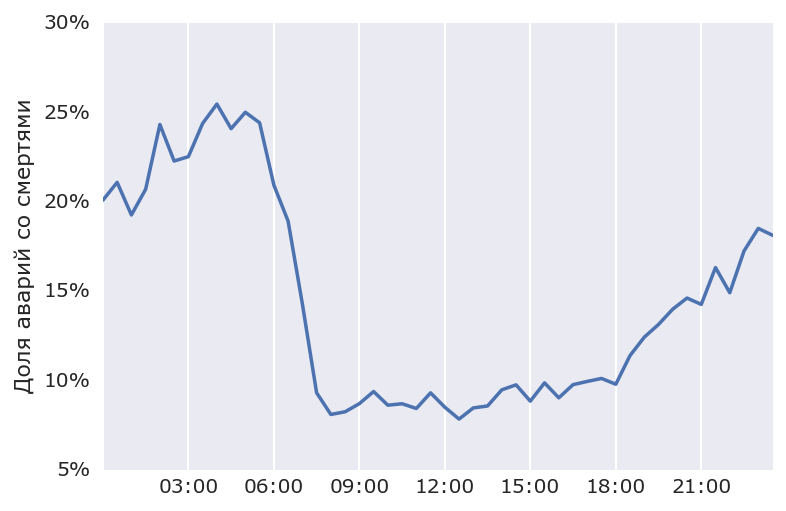

In [34]:
%run -n main.py
show_fatalities_during_day(gibdd_cards)

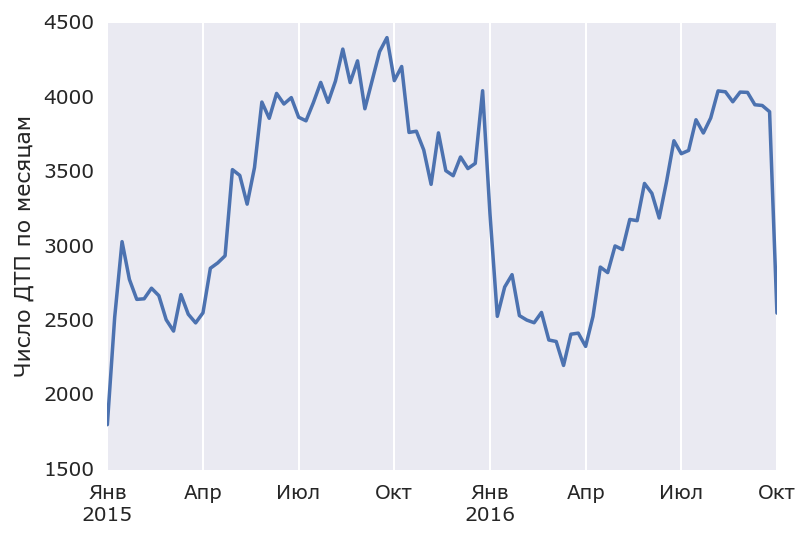

In [35]:
%run -n main.py
show_crashes_during_year(gibdd_cards)

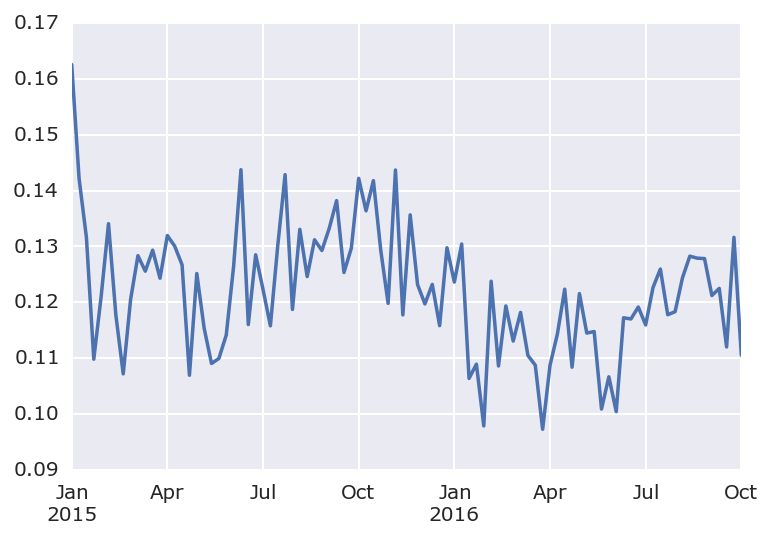

In [36]:
show_fatalities_during_year(gibdd_cards)

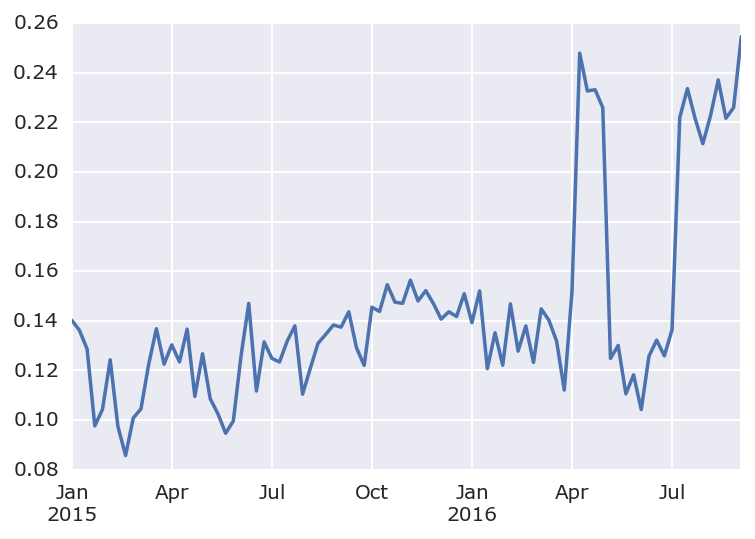

In [37]:
show_fatalities_during_year(saferoads)

In [38]:
# show_crashes_during_week(gibdd_cards, alphas=[0.5, 0.5, 0.5, 0.5, 0.5, 0.7, 0.7])

/Users/alexkuk/envs/mypy/lib/python2.7/site-packages/pandas/tools/plotting.py:968: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


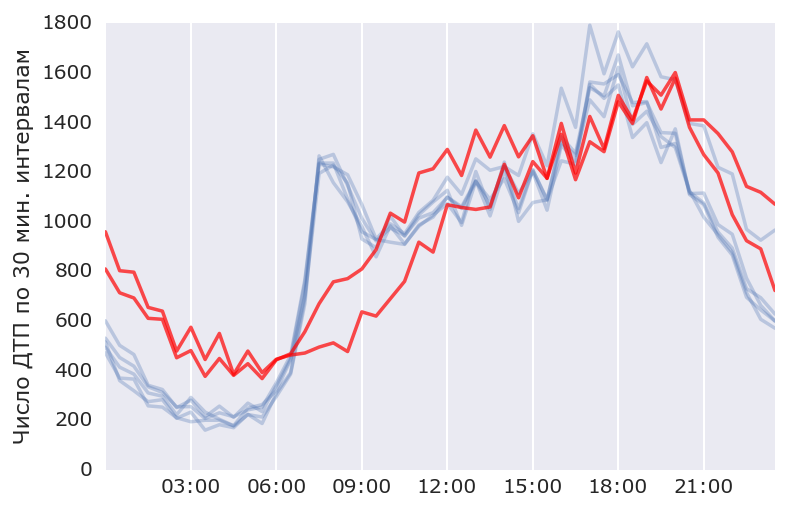

In [39]:
%run -n main.py
show_crashes_during_week(gibdd_cards, alphas=[0.3, 0.3, 0.3, 0.3, 0.3, 0.7, 0.7])

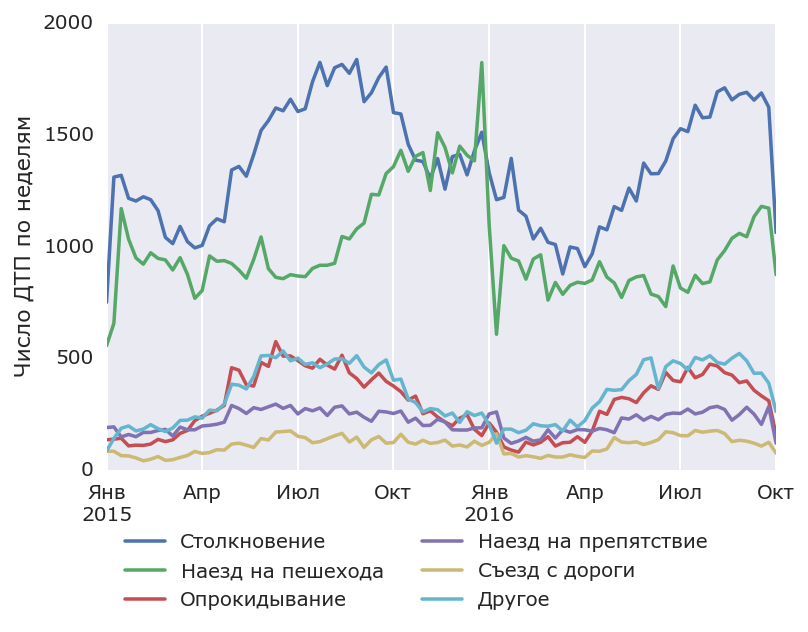

In [40]:
%run -n main.py
show_crashes_during_year_by_type(gibdd_cards, types=TYPES[:5], other=True)

In [41]:
# интересно только про велосипедистов
# show_crashes_during_year_by_type(gibdd_cards, types=TYPES[5:10])

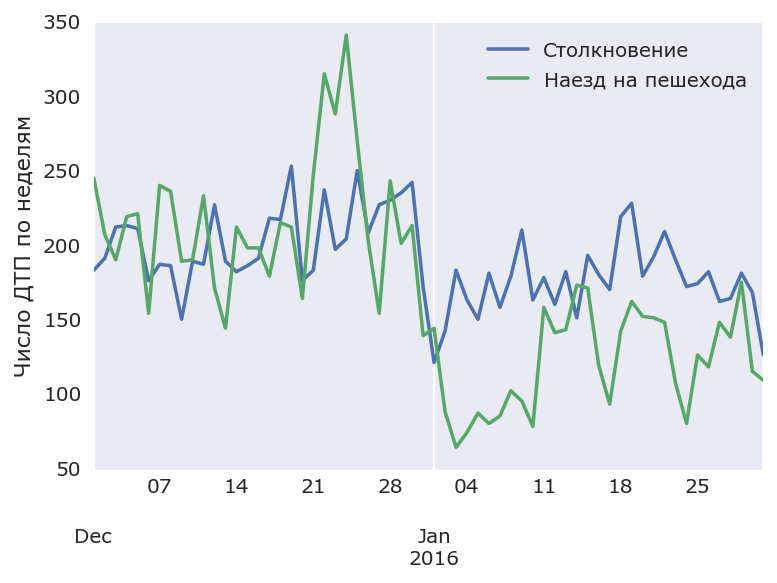

In [42]:
# пик примерно 22, 23 января
show_new_year_spike(gibdd_cards)

In [43]:
# есть контраст, но супер интересного нет
# show_crashes_during_week_by_type(gibdd_cards, types=TYPES[:5])
# show_crashes_during_week_by_type(gibdd_cards, types=TYPES[5:10])

In [44]:
# чёт особо нет контраста
# show_crashes_during_week_by_region_size(gibdd_cards, gibdd_regions)

# Подробно

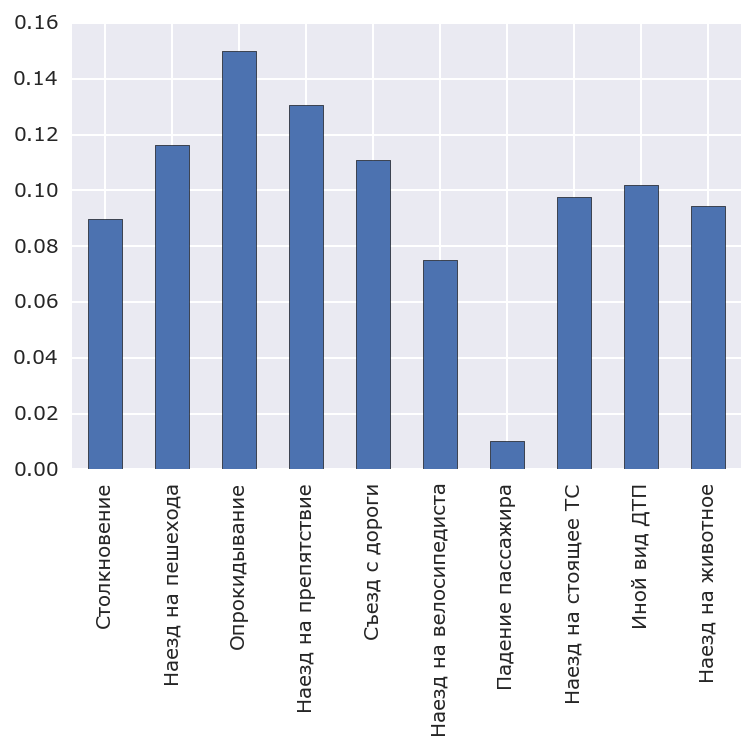

In [45]:
%run -n main.py
show_death_by_types(gibdd_cards)

In [46]:
%run -n main.py
# Всё сводится к отсутствию разметки
# show_types_by_problem(gibdd_cards)

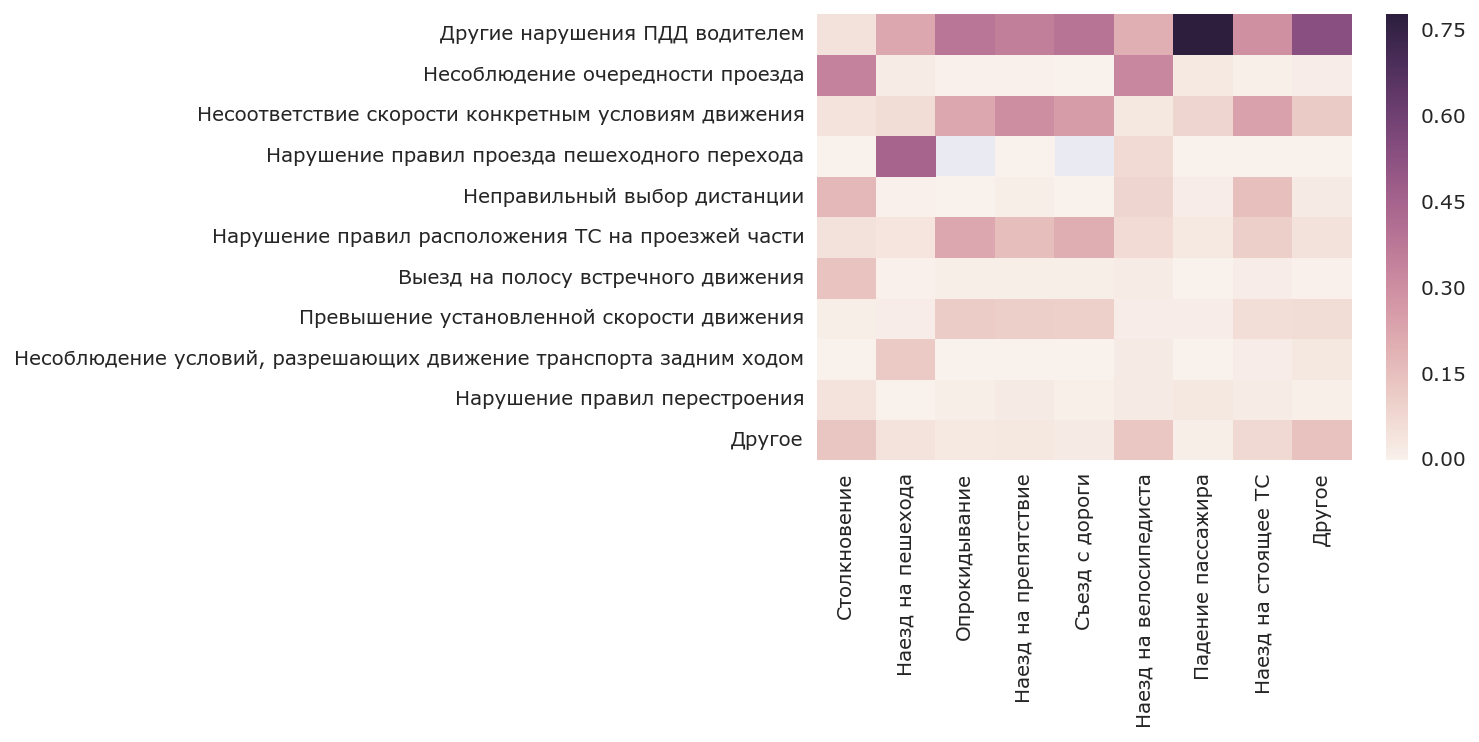

In [47]:
%run -n main.py
show_types_by_reason(gibdd_cards, DRIVER, TOP_DRIVER_REASONS)

In [48]:
# Всё попадает в "иное"
# show_types_by_reason(gibdd_cards, PEDESTRIAN, TOP_PEDESTRIAN_REASONS)
# show_types_by_reason(gibdd_cards, PASSENGER, TOP_PASSENGER_REASONS)

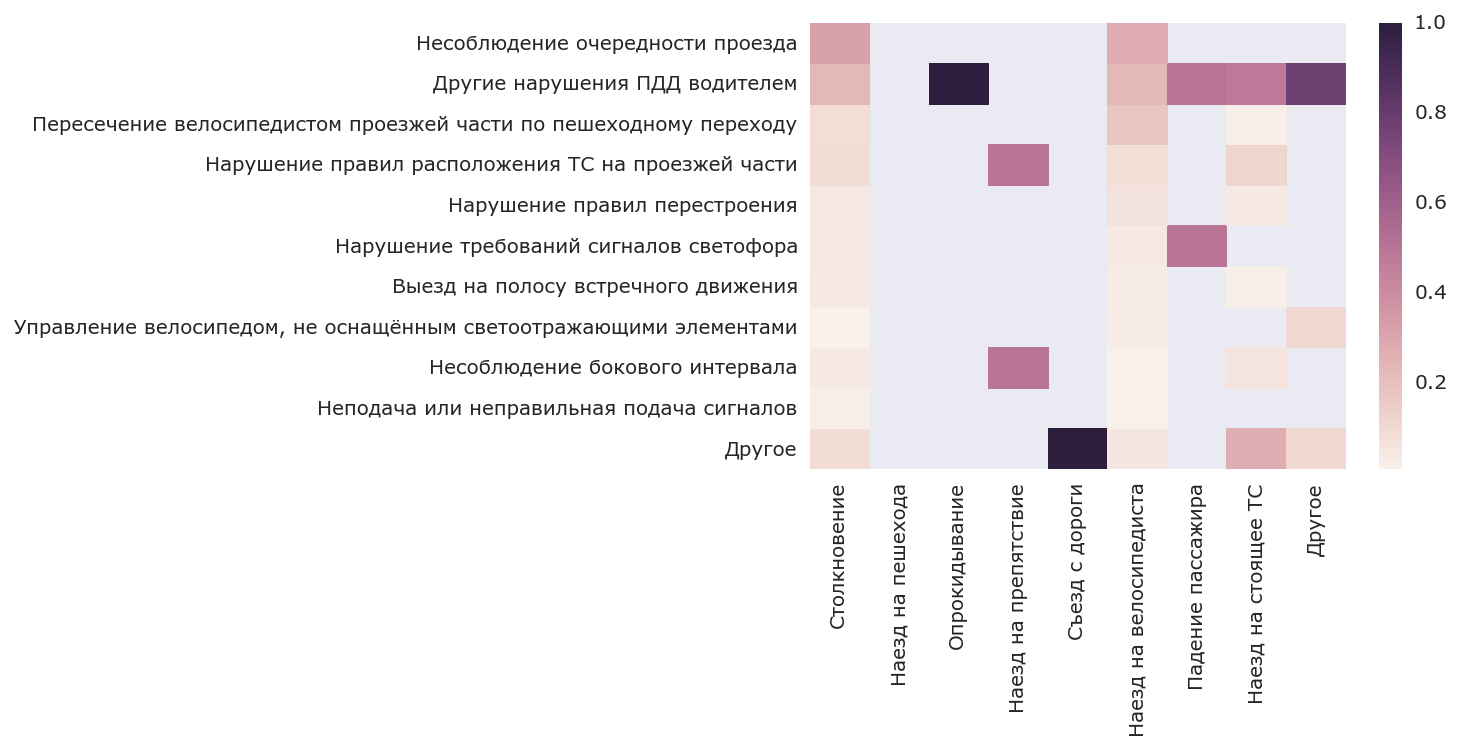

In [49]:
show_types_by_reason(gibdd_cards, BICYCLE, TOP_BICYCLE_REASONS)

## Машины

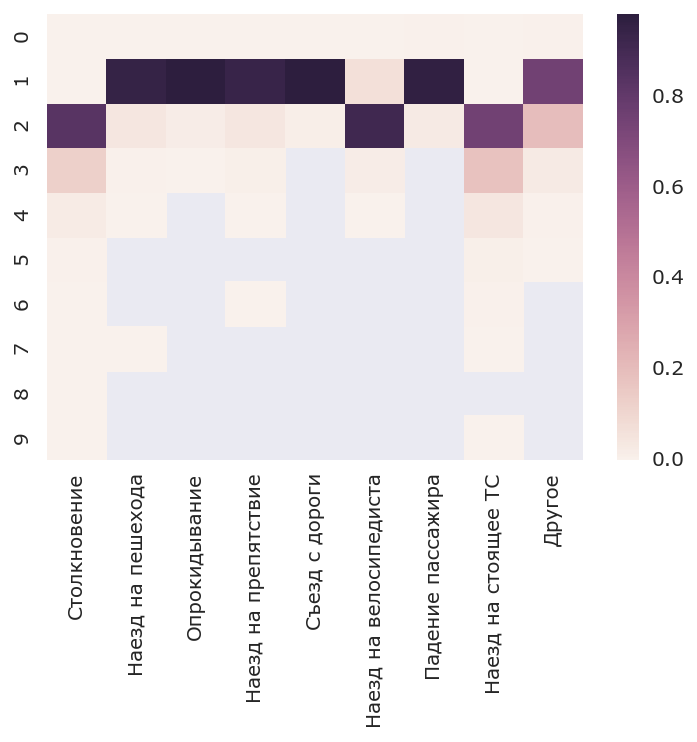

In [50]:
show_vehicle_count_by_type(saferoads)

In [51]:
# всё "передняя часть"
# show_types_by_parts(saferoads)

In [52]:
# всё "легковые автомобили"
# show_types_by_vehicle(saferoads)

In [53]:
# всё "передний привод, левый руль"
# show_types_by_privod(saferoads)

In [54]:
# всё летние
# show_types_by_tyre(saferoads)

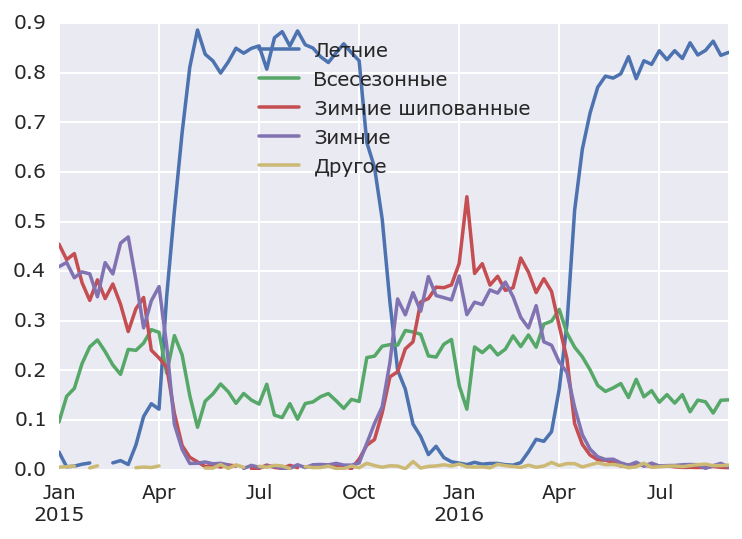

In [55]:
%run -n main.py
show_crashes_during_year_by_tyre(saferoads)

In [56]:
# странный провал в 2009 году    
# show_vehicle_years(saferoads)

## Люди

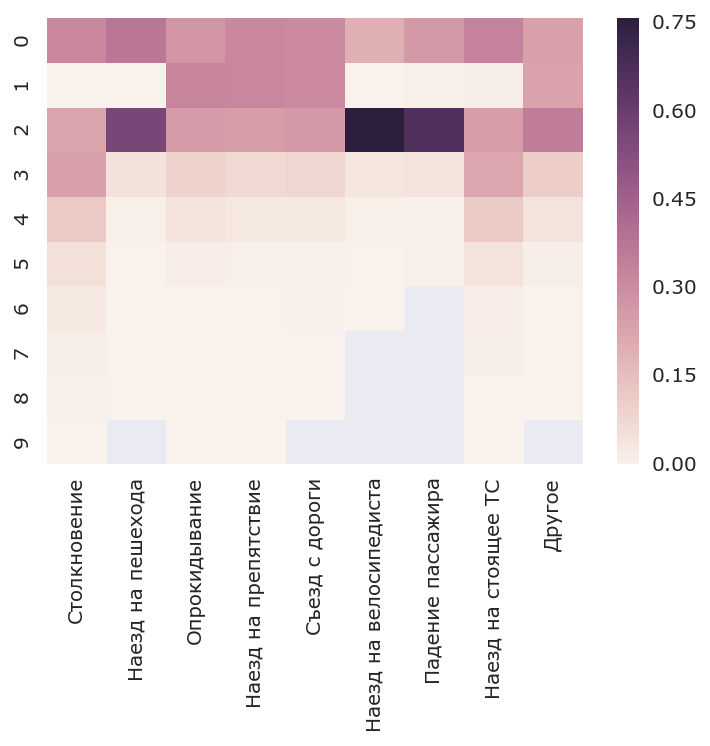

In [57]:
show_participants_count_by_type(saferoads)

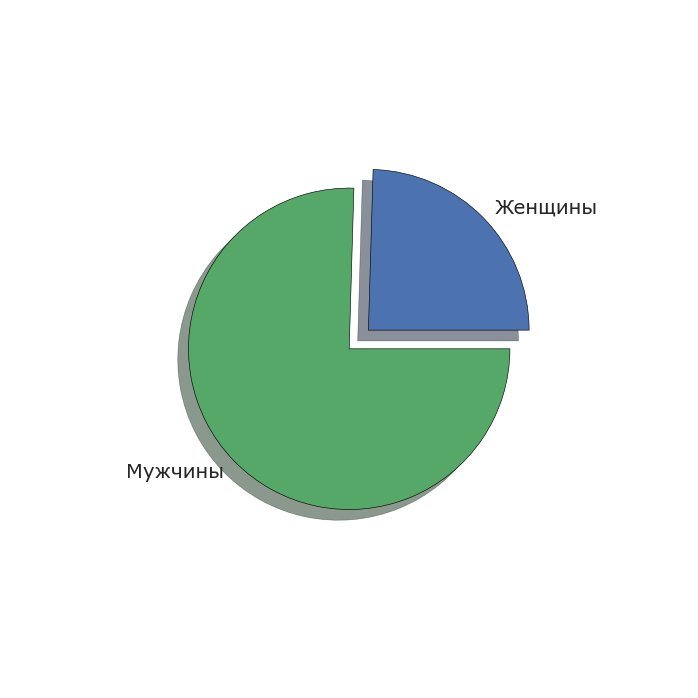

In [58]:
%run -n main.py    
show_genders(saferoads)

In [59]:
# по всем типам почти одно и то же    
# show_genders_by_type(saferoads)

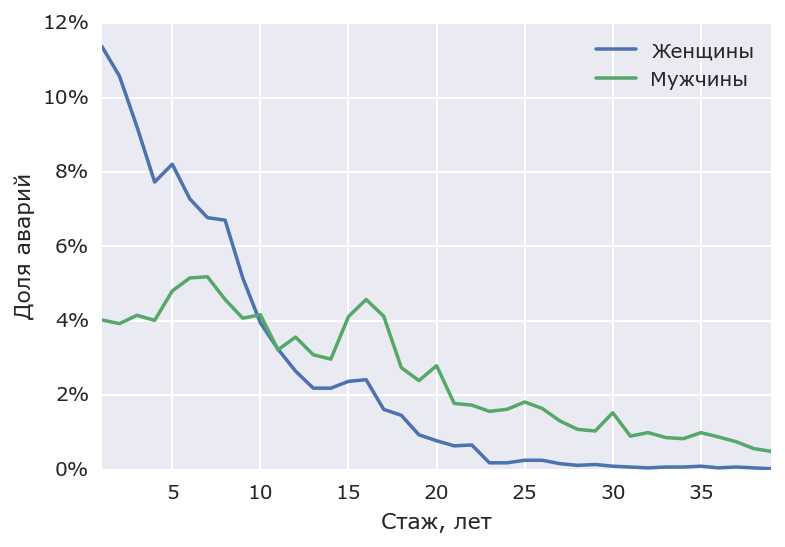

In [60]:
show_genders_by_experience(saferoads)

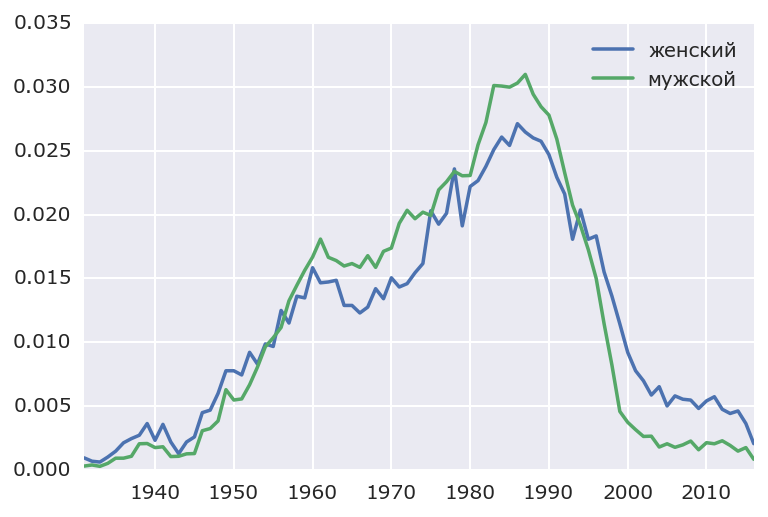

In [61]:
%run -n main.py    
show_genders_by_birth(saferoads)

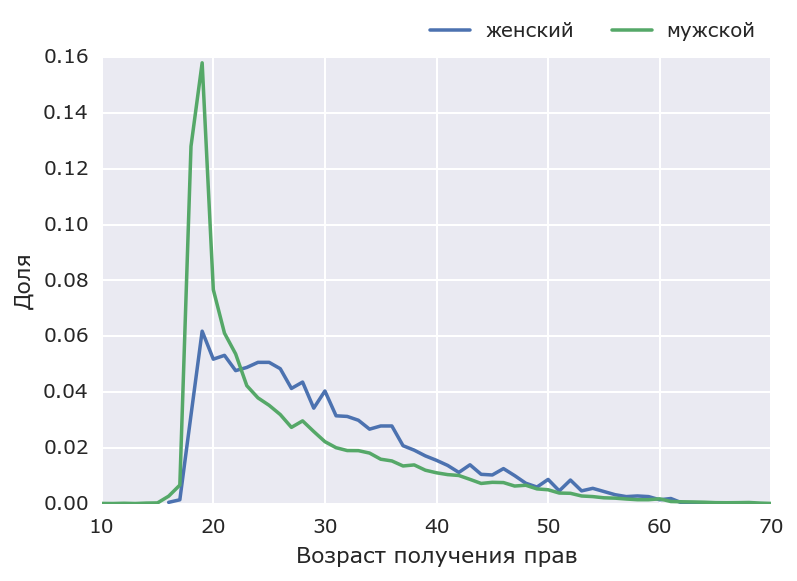

In [62]:
%run -n main.py
show_genders_by_age(saferoads)